# Bank Marketing Dataset

## Table of Contents
[1. Description](#Description)  
[2. EDA & Feature Transformation](#EDA)  
- [2.1 Age](#Age)
    - [2.1.1 Age Insights](#Age.i)
    - [2.1.2 Age Feature Transformation](#Age.f)
- [2.2 Jobs](#Jobs)
    - [2.2.1 Jobs Insights](#Job.i)
    - [2.2.2 Jobs Feature Transformation](#Jobs.f)
- [2.3 Marital](#Marital)
    - [2.3.1 Marital Insights](#Marital.i)
    - [2.3.2 Marital Feature Transformation](#Marital.f)
- [2.4 Education](#Education)  
    - [2.4.1 Education Insights](#Education.i)  
    - [2.4.2 Education Feature Transformation](#Education.f)
- [2.5 Default](#Default)
    - [2.5.1 Default Insights](#Default.i)
    - [2.5.2 Default Feature Transformation](#Default.f)
- [2.6 Housing](#Housing)
    - [2.6.1 Housing Insights](#Housing.i)
- [2.7 Loan](#Loan)
    - [2.7.1 Loan Insights](#Loan.i)
- [2.8 Contact](#Contact)
    - [2.8.1 Contact Insights](#Contact.i)
- [2.9 Month](#Month)
    - [2.9.1 Month Insights](#Month.i)
- [2.10 Day of the week](#Day)
    - [2.10.1 Day of the week Insights](#Day.i)
- [2.11 Duration](#Duration)
    - [2.11.1 Duration Insights](#Duration.i)
- [2.12 Campaign](#Campaign)
    - [2.12.1 Campaign Insights](#Campaign.i)
- [2.13 Pdays](#Pdays)
    - [2.13.1 Pdays Insights](#Pdays.i)
- [2.14 Previous](#Previous)
- [2.15 POutcome](#POutcome)  

[3. Data Scaling](#Data_scaling)  
[4. Data Balancing](#Data_balancing)  
[5. Machine Learning Models & Evaluation](#ML)  
- [5.1 Random Forest](#ML.rf)
- [5.2 Logistic Regression](#ML.lr)
- [5.3 K-Nearest Neighbors](#ML.knn)
- [5.4 Gradient Boosting](#ML.gb)
- [5.5 Neural Network](#ML.nn)
- [5.6 XGBoost](#ML.xgb)  

[6. Model Evaluation](#ME)
- [6.1 Voting Classifier](#Voting)
- [6.2 Final Results](#FE)
-[6.3 Reccomendations & Insights](#R&I)

<a id='Description'></a>
## 1. Description:

- Data Source: UCI Machine Learning Repository   
- The dataset and corresponding information can be found [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing)  
- (For this notebook, we will be using the bank-additional-full.csv dataset)

The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls.  
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In this notebook, we will be concerned with the following:
- Exploring the data
- Understanding the banks customer base
- Find insights and make reccomendations for improved marketing performance
- Transform Data as needed
- Build and Evaluate Machine Learning Models for successfuly predicting customers subscribin 

<a id='EDA'></a>
## 2. 
## Exploratory Data Analysis & Feature Transformation

#### Lets load the packages we will be using throughout the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Now we can load the data from the .csv file using Pandas

In [21]:
data = pd.read_csv('bank-additional-full.csv',delimiter = ';')

#### Lets take our first look at the data and start getting familiar with the variables

In [22]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Lets get a rough baseline for comparison of the models we will be creating

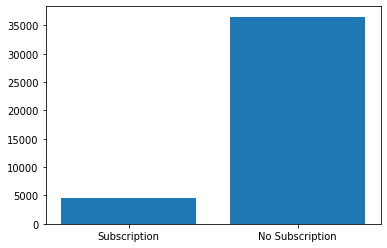

Total number of customers in dataset:  41188
Total number of subscribers to term deposit:  4640 (11.0% of customers)
Total number of non-subscribers to term deposit:  36548 (89.0% of customers)


In [24]:
total_entries = data.count()[0]
true_positives = data[data.y == 'yes'].count()[0]
positive_percent = round(true_positives / total_entries,2)
true_negatives = data[data.y == 'no'].count()[0]
negative_percent = round(true_negatives / total_entries,2)

yes_data = data[data.y == 'yes']
no_data = data[data.y == 'no']

labels = ['Subscription', 'No Subscription']

plt.figure()
plt.bar(labels,[true_positives,true_negatives])
plt.show()
print('Total number of customers in dataset: ', total_entries)
print('Total number of subscribers to term deposit: ', true_positives, f'({positive_percent * 100}% of customers)')
print('Total number of non-subscribers to term deposit: ', true_negatives,f'({negative_percent * 100}% of customers)')

##### Notes:
- If we naively build a model that predicts all customers will not subscribe to a term deposit, we could expect an accuracy of around 90 percent! Accuracy alone would be a poor metric in this case, since we are interested in finding who will subscribe to a term deposit, we would be more interested in a higher recall.
- We will keep this in mind and will later optimize our models for the best accuracy and true positives, while minimizing false positives.
- This dataset is highly imbalanced. We need to consider using a resampling method to balance the dataset before training.

#### Lets get a closer look at the data by looking at the columns and their types.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### Note the following facts:
- There are 11 columns that are string (object) and 10 columns that are int/float types  
- There are a total of 41188 entries (or records/rows)  
- For each column, there are 41188 non-null entries (we won't need to worry about imputing missing values)

#### Lets start looking at the individual columns and see what insights we can draw from the data

<a id='Age'></a>
### 2.1 
### Age

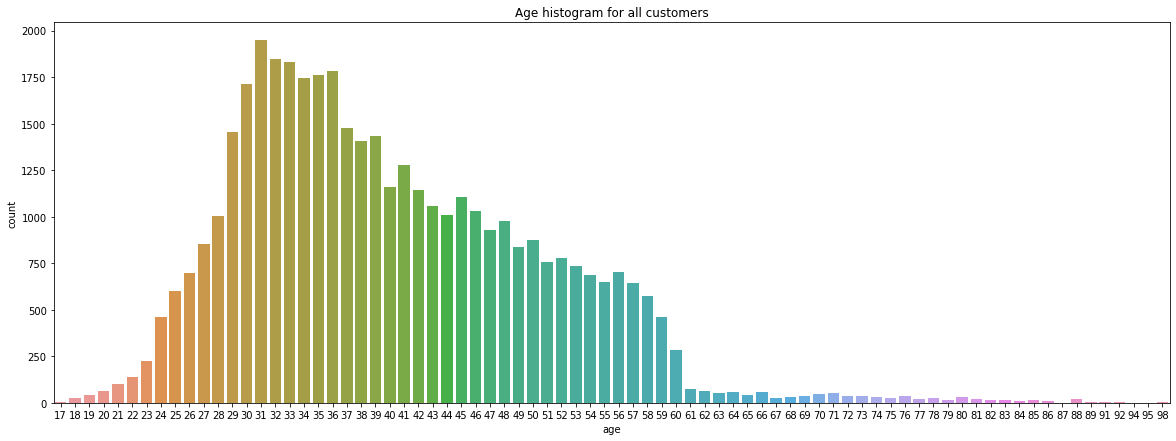

Ages greater than 69.5 are outliers


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [26]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'age',data=data)
plt.title('Age histogram for all customers')
plt.show()

Q1 = data.age.describe()[4]
Q2 = data.age.describe()[5]
Q3 = data.age.describe()[6]
IQR = Q3 - Q1

print('Ages greater than', Q3 +1.5*IQR, 'are outliers' )

data.age.describe()

#### Insights:  
- We can see that the ages are highly concentrated in the range of 21-60  
- The bank could benefit from increased marketing towards individuals of ages 17-21 & greater than 60

#### Let's take a closer look and see individual plots for ages of customers who have subscribed and those who haven't

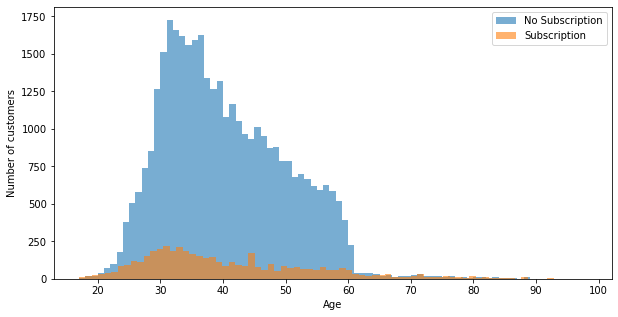

In [29]:
plt.figure(figsize = (10,5))
data.groupby('y').age.hist(grid = False,bins = len(np.unique(data.age)),alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.legend(['No Subscription','Subscription'])
plt.show()

#### Insights:
- A majority of the customers in the lower (17-21) and higher (60+) age ranges have subscribed to bank term deposits

##### Let's get a closer look by computing the ratios, subscriptions / total customers, in age group.

C:\Users\bindu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.


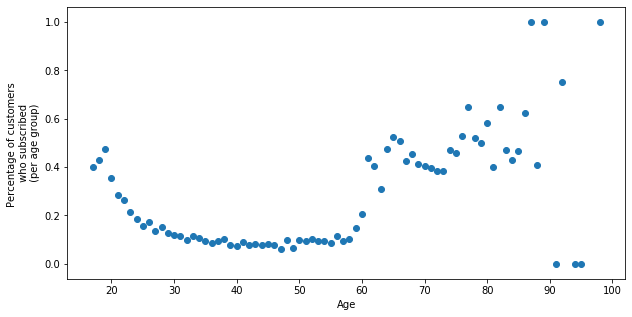

Age groups where liklihood of term deposit is greater than 50% :
65
66
76
77
78
80
82
86
87
89
92
98


C:\Users\bindu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [30]:
age_range = list(range(17,99))
yes_ = []
no_ = []
for age in age_range:
    temp_y = data[(data.age == age) & (data.y == 'yes')]
    temp_n = data[(data.age == age) & (data.y == 'no')]
    yes_.append(temp_y.count()[0])
    no_.append(temp_n.count()[0])
age_totals = [a + b for a,b in zip(yes_,no_)]
ratio = [a/b for a,b in zip(yes_,age_totals)]
plt.figure(figsize = (10,5))
plt.scatter(age_range,ratio)
plt.xlabel('Age')
plt.ylabel('Percentage of customers \n who subscribed \n (per age group) ')
plt.show()

print('Age groups where liklihood of term deposit is greater than 50% :')
high_ratio_indices = np.where(np.array(ratio) > 0.5)[0]
for index in high_ratio_indices:
    print(age_range[index])

<a id='Age.i'></a>
#### 2.1.1
#### Recap of insights found:
- We can see that the ages are highly concentrated in the range of 21-60
- A majority of the customers in the lower (17-21) and higher (60+) age ranges have subscribed to bank term deposits
- By increasing a customer base in the age range of 60+, we could expect a significant number of these customers, >50%, to become subscribers

#### Recommendations based on insights:
- It is likely that a conservative marketing campaign directed towards these two age groups could yield a strong increase in revenues

<a id='Age.f'></a>
#### 2.1.2
#### Feature transformation of age variable:
We will use the insights found above to transform the age variable into three categories:
- Older age group (60 <= age) will be category 2
- Younger age group (age <= 21) will be category 1
- Middle age group (21 < age < 60 ) will be category 0

In [8]:
younger_mask = data.age <= 21
older_mask = data.age >= 60
middle_mask = (data.age > 21) & (data.age < 60)


data.age.loc[older_mask] = 2
data.age.loc[younger_mask] = 1
data.age.loc[middle_mask] = 0

C:\Users\bindu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Lets take a look and see how many customers are in each category after the feature transformation

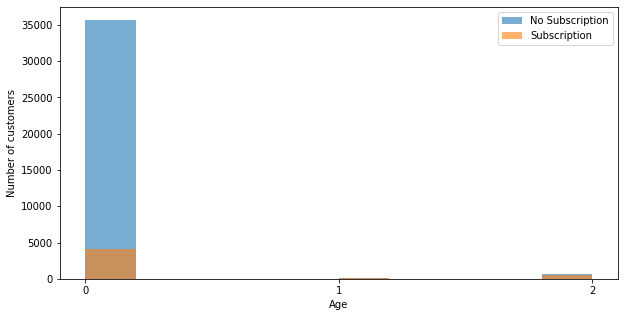

In [9]:
plt.figure(figsize = (10,5))
data.groupby('y').age.hist(grid = False,alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.xticks([0,1,2])
plt.legend(['No Subscription','Subscription'])
plt.show()

#### Note:
- The age variable has been transformed into one of three categories 0,1,2 which correspond to the likelihood, in increasing order, that a customer would subscribe to a term deposit

#### Let's take a look at the same variable using the results of the previous campaign
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- By only looking at entries where this variable is failure or success, we can see if our transformations hold true for the previous marketing campaign as well.

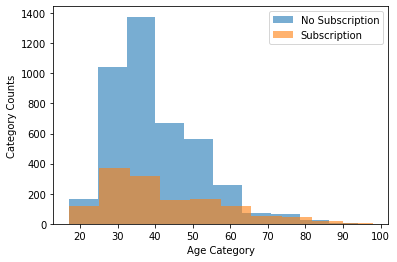

In [31]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').age.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Age Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

<a id='Jobs'></a>
### 2.2 
### Jobs

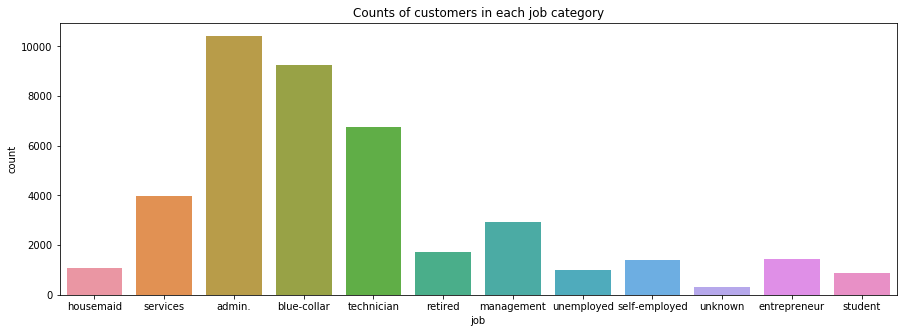

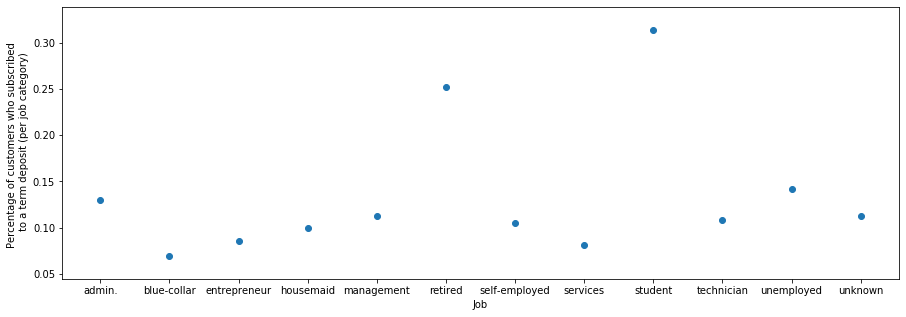

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=data)
plt.title('Counts of customers in each job category')
plt.show()

jobs = []
job_yes = []
job_no =[]
for job in np.unique(data.job):
        jobs.append(job)
        job_yes.append(data[(data.job == job) & (data.y == 'yes')].count()[0])
        job_no.append(data[(data.job == job) & (data.y == 'no')].count()[0])
job_totals = [a+b for a,b in zip(job_yes,job_no)]
job_ratio_yes = [a/b for a,b in zip(job_yes,job_totals)]

plt.figure(figsize = (15,5))
plt.scatter(jobs, job_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per job category)')
plt.xlabel('Job')
plt.show()

<a id='Job.i'></a>
#### 2.2.1
#### Insights:
- Retirees and students are more likely than individuals with other job titles to subscribe to a term deposit
- Students are ~30% likely to subscribe to a term deposit
- Retirees are ~25% likely to subscribe to a term deposit
- All other individuals are less than 15% likely to subscribe to a term deposit
- This adds some credibility to the insights found through EDA of Age variable.
- Students are likely to be in the age range of 17-21 and retirees are likely to be over the age of 60

<a id='Jobs.f'></a>
#### 2.2.2
#### Feature transformation of Jobs category into numerical variables

Using the percentage of individuals (in a given Job category) that subscribed to a bank term deposit, we will transform the variable into one of three categories:
- Percentage > 20% will be category 2
- 10% < Percentage <= 20% will be category 1
- Percentage <= 10% will be category 0

In [82]:
job_ratio_yes = np.array(job_ratio_yes)
high_ratio_jobs = []
mid_ratio_jobs = []
low_ratio_jobs = []
for index in range(len(job_ratio_yes)):
    ratio_value = job_ratio_yes[index]
    if ratio_value > 0.2:
        high_ratio_jobs.append(jobs[index])
    if (ratio_value <= 0.2) & (ratio_value > 0.1):
        mid_ratio_jobs.append(jobs[index])
    if ratio_value <= 0.1:
        low_ratio_jobs.append(jobs[index])

high_mask = data.job.isin(high_ratio_jobs)
mid_mask = data.job.isin(mid_ratio_jobs)
low_mask = data.job.isin(low_ratio_jobs)

data.job.loc[high_mask] = 2
data.job.loc[mid_mask] = 1
data.job.loc[low_mask] = 0

C:\Users\bindu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Lets take a look and see how many customers are in each Job category after transformation

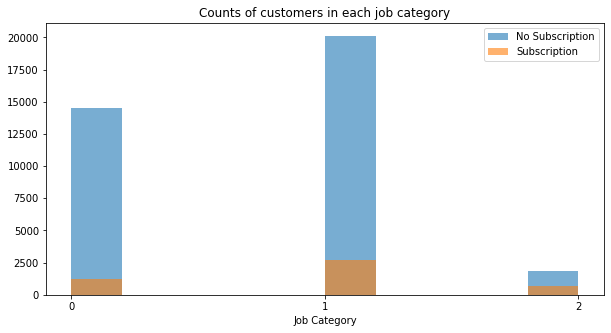

In [83]:
plt.figure(figsize=(10,5))
data.groupby('y').job.hist(grid = False,alpha = 0.6)
plt.title('Counts of customers in each job category')
plt.xlabel('Job Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1,2])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

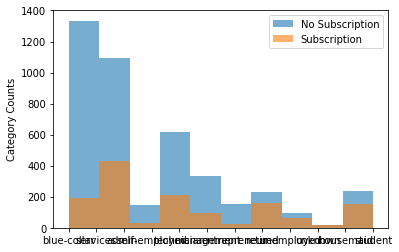

In [32]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').job.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel
('Job Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

<a id='Marital'></a>
### 2.3
### Marital

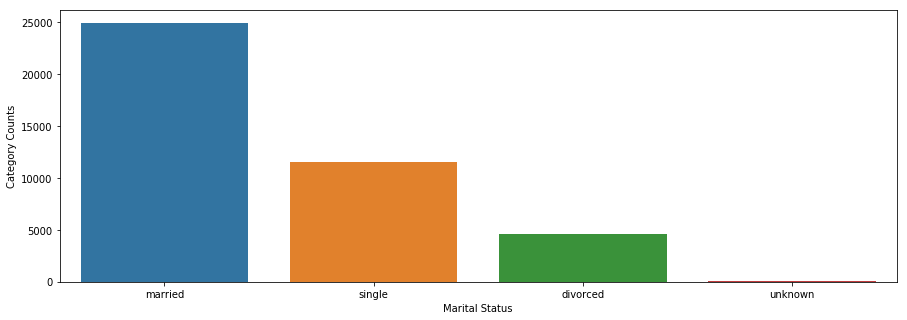

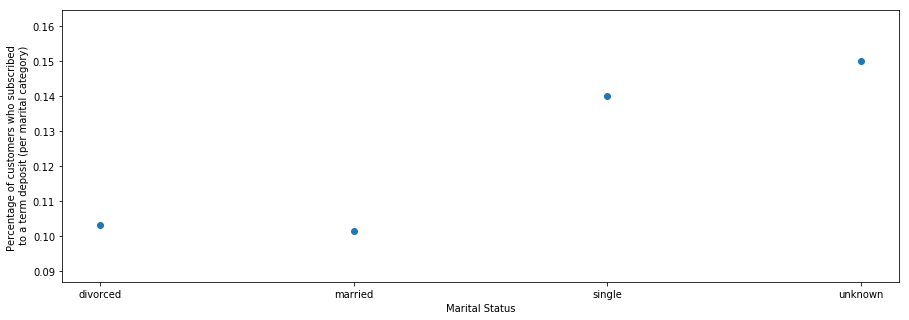

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',data=data)
plt.xlabel('Marital Status')
plt.ylabel('Category Counts')
plt.show()


unique_marital = np.unique(data.marital)

marital_yes = []
marital_no = []

for marital in unique_marital:
    marital_yes.append(data[(data.marital == marital) & (data.y == 'yes')].count()[0])
    marital_no.append(data[(data.marital == marital) & (data.y == 'no')].count()[0])
marital_totals = [a + b for a,b in zip(marital_yes,marital_no)]
marital_ratio_yes = [a/b for a,b in zip(marital_yes,marital_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_marital, marital_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per marital category)')
plt.xlabel('Marital Status')
plt.show()

<a id='Marital.i'></a>
#### 2.3.1
#### Insights:
- Customers whose marital status is unknown or single are more likely to subscribe to a term deposit
- Note that the number of customers whose marital status is unknown is extremely small so this may be slightly misleading
- Note that the absolute difference in percentages between any two categories above is likely to be around 0.05 or 5%, consider dropping this variable before training

<a id='Marital.f'></a>
#### 2.3.2
#### Feature transformation of Marital category into numerical variables

Using the percentage of individuals (in a given Marital category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- Single or Unknown will be category 1
- Divorced or Married will be category 0

In [33]:
mask1 = data.marital.isin(['single','unknown'])
mask0 = data.marital.isin(['married','divorced'])

data.marital.loc[mask1] = 1
data.marital.loc[mask0] = 0

C:\Users\bindu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Lets take a look at the marital variable after transformation

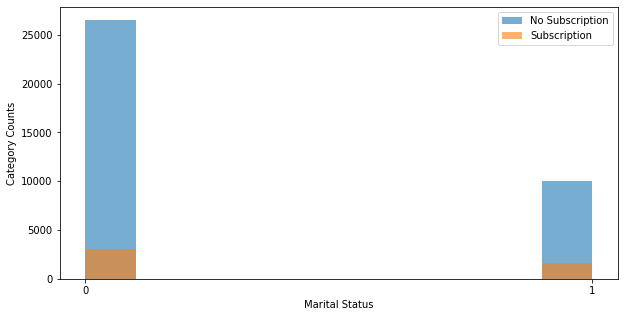

In [35]:
plt.figure(figsize =(10,5))
data.groupby('y').marital.hist(grid = False, alpha = 0.6)
plt.xticks([0,1])
plt.xlabel('Marital Status')
plt.ylabel('Category Counts')
plt.legend(['No Subscription', 'Subscription'])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign

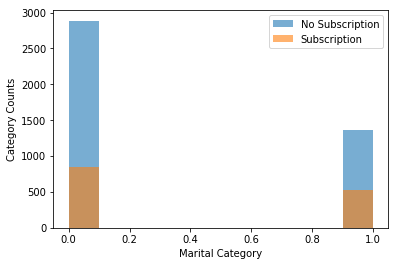

In [20]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').marital.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Marital Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

<a id='Education'></a>
### 2.4 
### Education

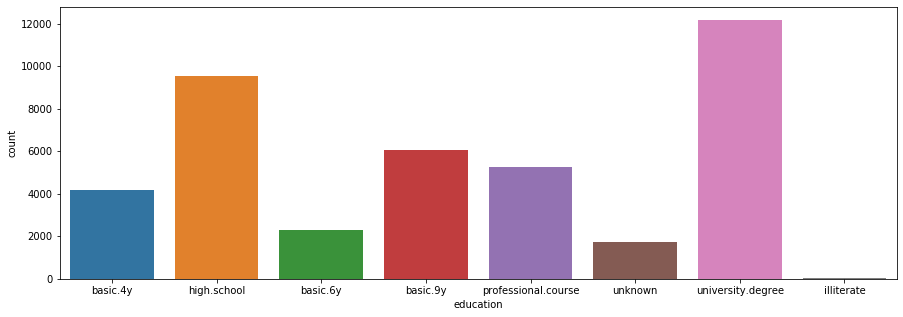

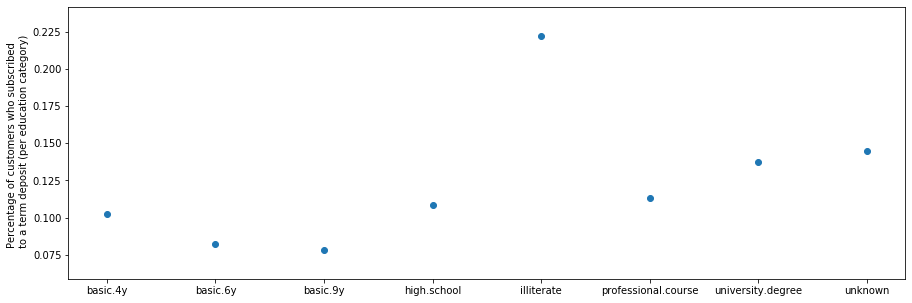

In [36]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'education', data = data)
plt.show()

unique_education = np.unique(data.education)

education_yes = []
education_no = []

for education in unique_education:
    education_yes.append(data[(data.education == education) & (data.y == 'yes')].count()[0])
    education_no.append(data[(data.education == education) & (data.y == 'no')].count()[0])
education_totals = [a + b for a,b in zip(education_yes,education_no)]
education_ratio_yes = [a/b for a,b in zip(education_yes,education_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_education, education_ratio_yes)
plt.ylabel('Percentage of customers who subscribed \n to a term deposit (per education category)')
plt.show()

<a id='Education.i'></a>
#### 2.4.1
#### Insights:
- Customers are slightly more likely to subscribe to a term deposit if their education is in one of the following categories: 4y,highschool,illiterate, profes., u. degree, unknown
- Note that the number of customers who are illiterate is extremely low and this might be misleading
- Note that the absolute difference in percentages between any two categories above is likely to be around 0.075 or 7.5%, consider dropping this variable before training

<a id='Education.f'></a>
#### 2.4.2
#### Feature transformation of Education category into numerical variables

Using the percentage of individuals (in a given Education category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- Percentage > 10% will be category 1
- Percentage <= 10% will be category 0

In [37]:
upper_edu = []
lower_edu = []

for index in range(len(unique_education)):
    if education_ratio_yes[index] > 0.1:
        upper_edu.append(unique_education[index])
    if education_ratio_yes[index] <= 0.1:
        lower_edu.append(unique_education[index])

mask1 = data.education.isin(upper_edu)
mask0 = data.education.isin(lower_edu)

data.education.loc[mask1] = 1
data.education.loc[mask0] = 0


#### Lets take a look at the education variable after transformation

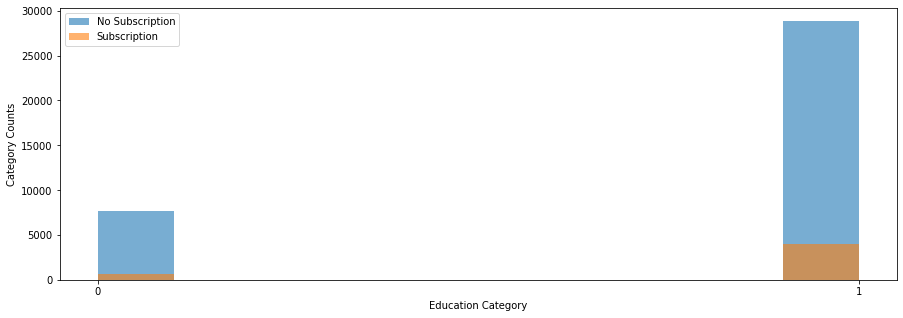

In [38]:
plt.figure(figsize = (15,5))
data.groupby('y').education.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.xlabel('Education Category')
plt.ylabel('Category Counts')
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

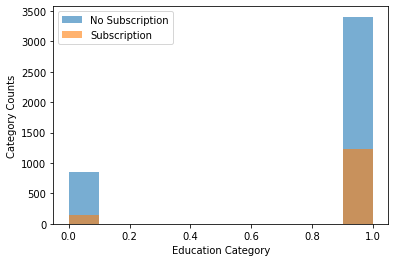

In [39]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').education.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Education Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

<a id='Default'></a>
### 2.5 
### Default
Variable Information:
- default: has credit in default? (categorical: 'no','yes','unknown')

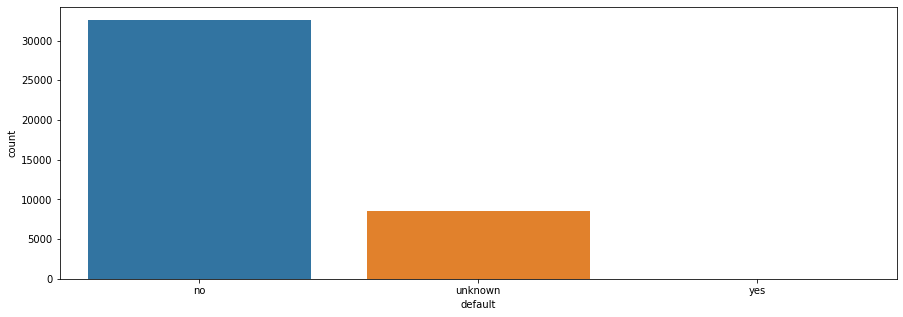

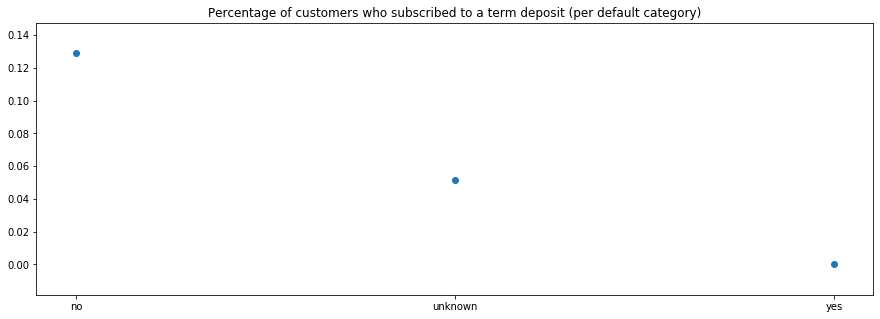

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(x='default',data=data)
plt.show()

unique_default = np.unique(data.default)

default_yes = []
default_no = []

for default in unique_default:
    default_yes.append(data[(data.default == default) & (data.y == 'yes')].count()[0])
    default_no.append(data[(data.default == default) & (data.y == 'no')].count()[0])
default_totals = [a + b for a,b in zip(default_yes,default_no)]
default_ratio_yes = [a/b for a,b in zip(default_yes,default_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_default, default_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per default category)')
plt.show()

<a id='Default.i'></a>
#### 2.5.1
#### Insights:
- Customers who have not previously subscribed to a term deposit are more likely than customers who have or customers whose status is unknown.
- Marketing campaigns can be directed towards this subset of customer for increased revenues

<a id='Default.f'></a>
#### 2.5.2
#### Feature transformation of Education category into numerical variables

Using the percentage of individuals (in a given Default category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- default == no will be category 1
- default == yes or unknown will be category 0

In [41]:
data.default.loc[data.default == 'no'] = 1
data.default.loc[data.default == 'unknown'] = 0
data.default.loc[data.default == 'yes'] = 0

#### Lets take a look at the Default variable after transformation

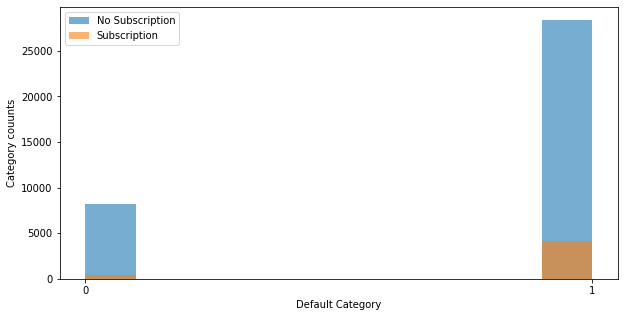

In [42]:
plt.figure(figsize = (10,5))
data.groupby('y').default.hist(grid = False,alpha = 0.6)
plt.xticks([0,1])
plt.legend(['No Subscription','Subscription'])
plt.xlabel('Default Category')
plt.ylabel('Category couunts')
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

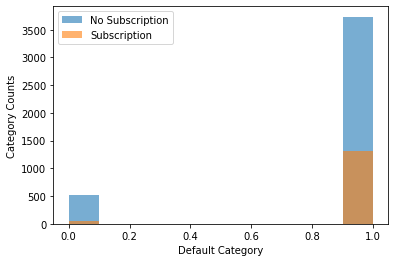

In [43]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').default.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Default Category')
plt.show()

As we can see, the same holds true for the results of the previos campaign

<a id='Housing'></a>
### 2.6 
### Housing
Variable Information:
- housing: has housing loan? (categorical: 'no','yes','unknown')

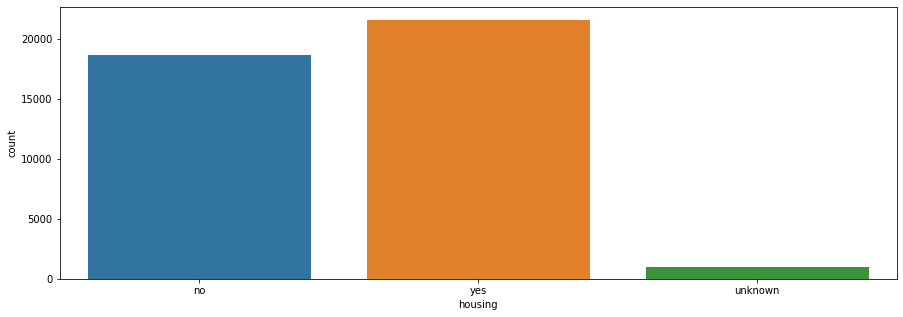

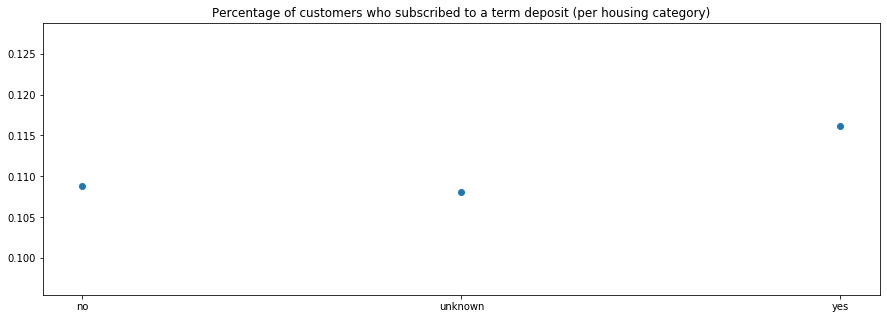

In [44]:
plt.figure(figsize = (15,5))
sns.countplot(x='housing',data=data)
plt.show()

unique_housing = np.unique(data.housing)

housing_yes = []
housing_no = []

for housing in unique_housing:
    housing_yes.append(data[(data.housing == housing) & (data.y == 'yes')].count()[0])
    housing_no.append(data[(data.housing == housing) & (data.y == 'no')].count()[0])
housing_totals = [a + b for a,b in zip(housing_yes,housing_no)]
housing_ratio_yes = [a/b for a,b in zip(housing_yes,housing_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_housing, housing_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per housing category)')
plt.show()

<a id='Housing.i'></a>
#### 2.6.1
#### Insights:
- We can see that there is no correlation between the housing variable and subscription status
- We will drop this column

In [45]:
data = data.drop(labels = 'housing', axis = 1)

In [46]:
data

,age,job,marital,education,default,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Loan'></a>
### 2.7
### Loan
Variable Information:
-  loan: has personal loan? (categorical: 'no','yes','unknown')

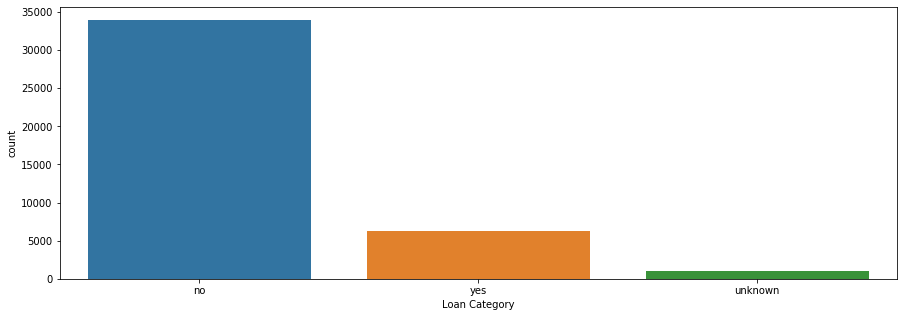

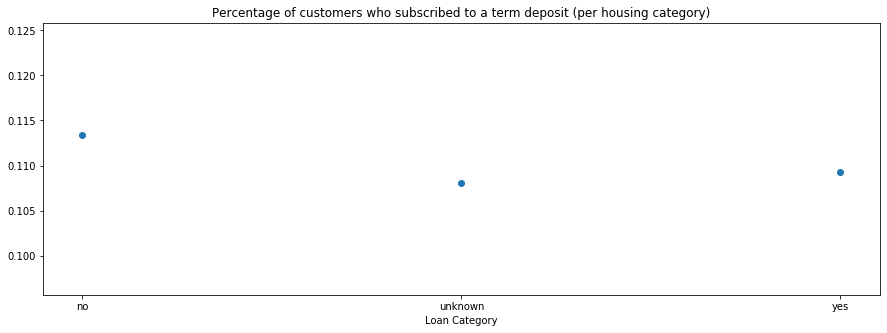

In [47]:
plt.figure(figsize = (15,5))
sns.countplot(x='loan',data=data)
plt.xlabel('Loan Category')
plt.show()

unique_loan = np.unique(data.loan)

loan_yes = []
loan_no = []

for loan in unique_loan:
    loan_yes.append(data[(data.loan == loan) & (data.y == 'yes')].count()[0])
    loan_no.append(data[(data.loan == loan) & (data.y == 'no')].count()[0])
loan_totals = [a + b for a,b in zip(loan_yes,loan_no)]
loan_ratio_yes = [a/b for a,b in zip(loan_yes,loan_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_loan, loan_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per housing category)')
plt.xlabel('Loan Category')
plt.show()

<a id='Loan.i'></a>
#### 2.7.1
#### Insights:
- We can see that there is no correlation between the loan variable and subscription status
- We will drop this column

In [48]:
data = data.drop(labels = 'loan', axis = 1)

In [49]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Contact'></a>
### 2.8
### Contact
Variable Information:
- contact: contact communication type (categorical: 'cellular','telephone') 
- related with the last contact of the current campaign

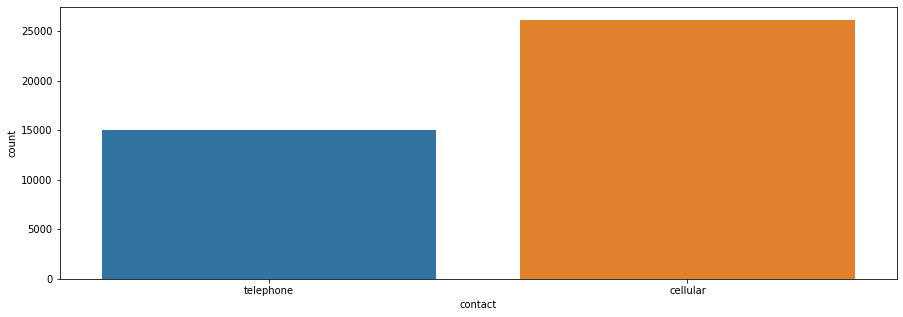

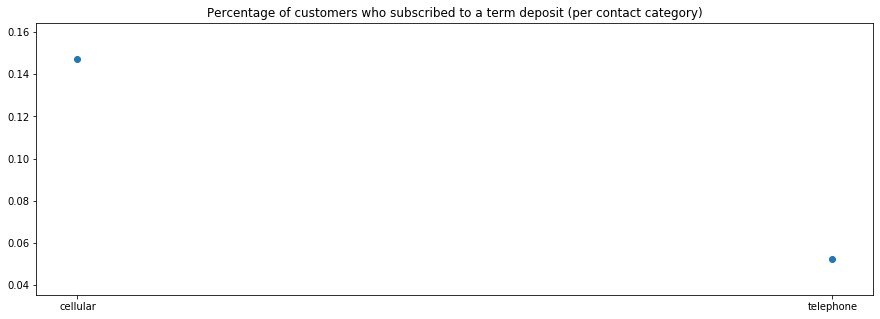

In [50]:
plt.figure(figsize = (15,5))
sns.countplot(x='contact',data=data)
plt.show()

unique_contact = np.unique(data.contact)

contact_yes = []
contact_no = []

for contact in unique_contact:
    contact_yes.append(data[(data.contact == contact) & (data.y == 'yes')].count()[0])
    contact_no.append(data[(data.contact == contact) & (data.y == 'no')].count()[0])
contact_totals = [a + b for a,b in zip(contact_yes,contact_no)]
contact_ratio_yes = [a/b for a,b in zip(contact_yes,contact_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_contact, contact_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per contact category)')
plt.show()

<a id='Contact.i'></a>
#### 2.8.1
#### Insights:
- Customers who were last contacted through cellular communication were ~10% more likely to subscribe to a term deposit

<a id='Contact.i'></a>
#### 2.8.2
#### Feature transformation of the Contact variable into numerical variable

Using the percentage of individuals (in a given Contact category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- Cellular will be category 1
- Telephone will be category 0

In [51]:
data.contact.loc[data.contact == 'cellular'] = 1
data.contact.loc[data.contact == 'telephone'] = 0

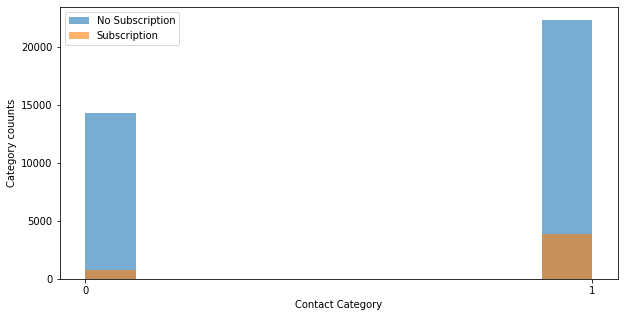

In [52]:
plt.figure(figsize = (10,5))
data.groupby('y').contact.hist(grid = False,alpha = 0.6)
plt.xticks([0,1])
plt.legend(['No Subscription','Subscription'])
plt.xlabel('Contact Category')
plt.ylabel('Category couunts')
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

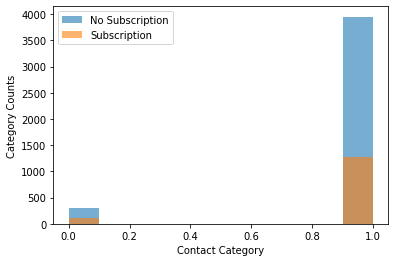

In [53]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').contact.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Contact Category')
plt.show()

- For this variable, we see slightly different results than we do for the current campaign. 
- Consider dropping this variable when testing model performance.

<a id='Month'></a>
### 2.9 
### Month
Variable Information:
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- related with the last contact of the current campaign

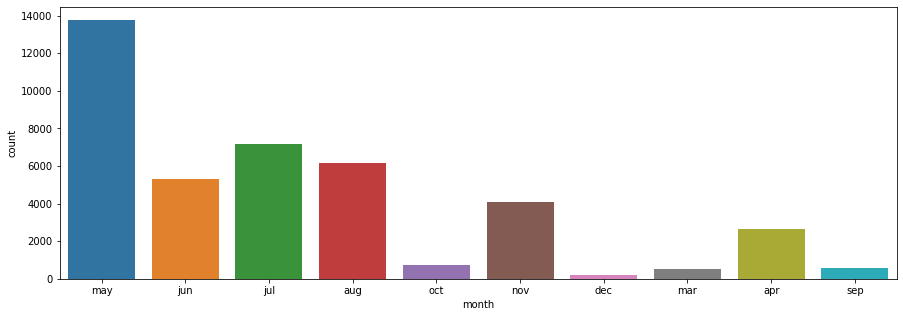

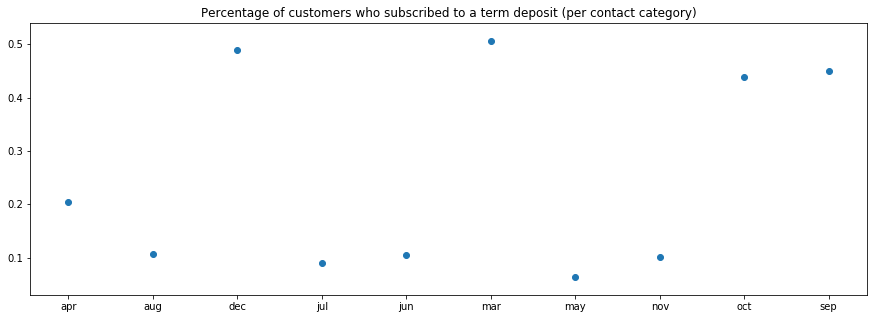

In [54]:
plt.figure(figsize = (15,5))
sns.countplot(x='month',data=data)
plt.show()

unique_month = np.unique(data.month)

month_yes = []
month_no = []

for month in unique_month:
    month_yes.append(data[(data.month == month) & (data.y == 'yes')].count()[0])
    month_no.append(data[(data.month == month) & (data.y == 'no')].count()[0])
month_totals = [a + b for a,b in zip(month_yes,month_no)]
month_ratio_yes = [a/b for a,b in zip(month_yes,month_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_month, month_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per contact category)')
plt.show()

<a id='Month.i'></a>
#### 2.9.1
#### Insights:
- Customers who were contacted during Dec, Mar, Oct, and Sep were over 30% more likely to subscribe to a term deposit
- Marketing campaigns should be concentrated in the months of Mar, Sep, Oct, Dec to increase revenues

<a id='Month.i'></a>
#### 2.9.2
#### Feature transformation of the Month variable into numerical variable

Using the percentage of individuals (in a given Month category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- Percentage > 30% will be category 1
- Percentage < 30% will be category 0

In [55]:
mask1 = data.month.isin(['dec','mar','oct','sep'])
mask0 = data.month.isin(['apr','aug','jul','jun','may','nov'])

data.month.loc[mask1] = 1
data.month.loc[mask0] = 0

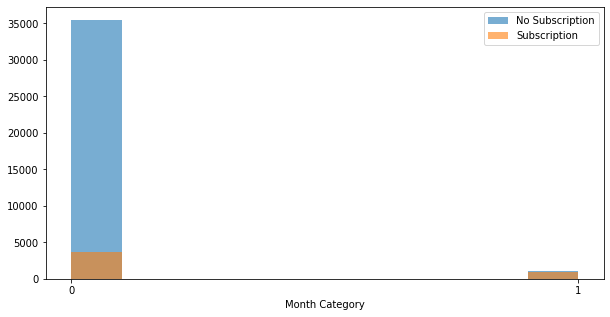

In [56]:
plt.figure(figsize = (10,5))
data.groupby('y').month.hist(grid = False, alpha = 0.6)
plt.xlabel('Month Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign

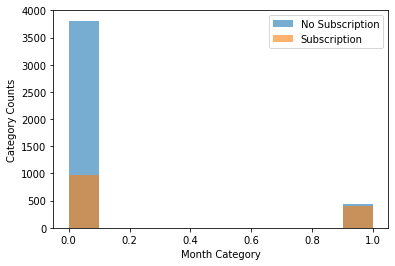

In [57]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').month.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Month Category')
plt.show()

#### Insights:
- As we can see, the same holds true for the results of the previos campaign

<a id='Day'></a>
### 2.10 
### Day of the week
Variable information:
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- related with the last contact of the current campaign

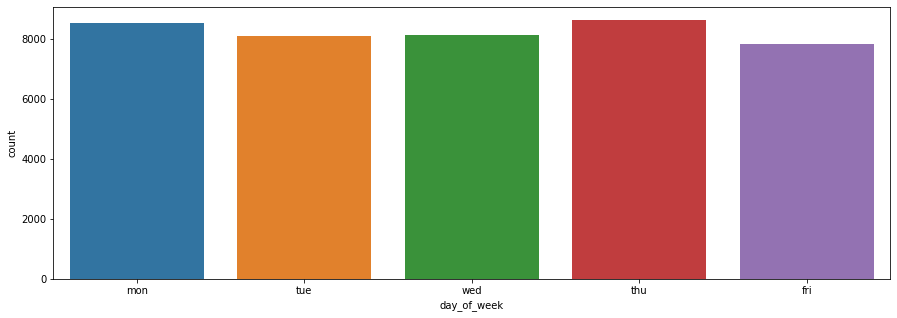

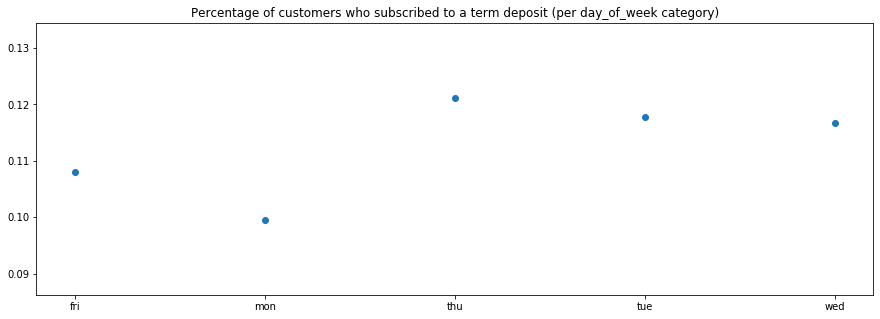

In [58]:
plt.figure(figsize = (15,5))
sns.countplot(x='day_of_week',data=data)
plt.show()

unique_day_of_week = np.unique(data.day_of_week)

day_of_week_yes = []
day_of_week_no = []

for day_of_week in unique_day_of_week:
    day_of_week_yes.append(data[(data.day_of_week == day_of_week) & (data.y == 'yes')].count()[0])
    day_of_week_no.append(data[(data.day_of_week == day_of_week) & (data.y == 'no')].count()[0])
day_of_week_totals = [a + b for a,b in zip(day_of_week_yes,day_of_week_no)]
day_of_week_ratio_yes = [a/b for a,b in zip(day_of_week_yes,day_of_week_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_day_of_week, day_of_week_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per day_of_week category)')
plt.show()

<a id='Day.i'></a>
#### 2.10.1
#### Insights:
- There is no significant change in likelihood of subscription between the days of the week for last contact
- We will drop this column

In [59]:
data = data.drop(labels='day_of_week',axis = 1)

In [60]:
data

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,0,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,0,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,0,0,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,0,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,0,0,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,1,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,1,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,1,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,1,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Duration'></a>
### 2.11 
### Duration

Variable information:
- duration: last contact duration, in seconds (numeric).
- Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Due to the insights reported by the data collector/provider, we will discard this column since our intention here is to build a predictive model.

In [61]:
data = data.drop(labels = 'duration', axis = 1)

In [62]:
data

,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,1,0,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,1,0,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Campaign'></a>
### 2.12 
### Campaign
Variable information:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


In [48]:
data.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

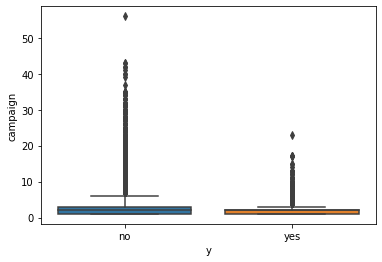

Outliers are greater than 6.0


In [63]:
Q1 = data.campaign.describe()[4]
Q3 = data.campaign.describe()[6]
IQR = Q3 - Q1

sns.boxplot(x = 'y',y = 'campaign', data = data)
plt.show()

print('Outliers are greater than', Q3 + 1.5 * IQR)

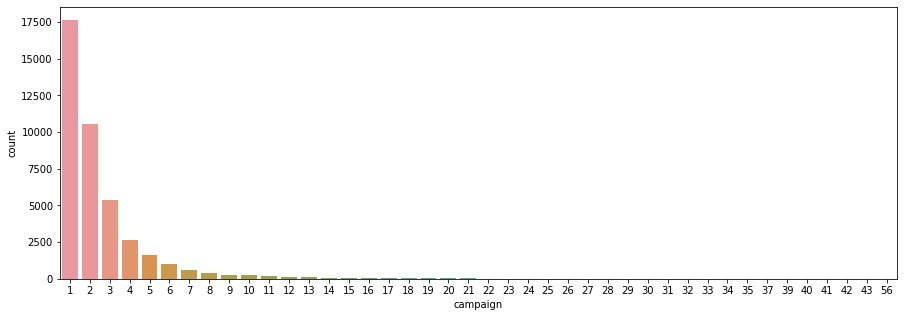

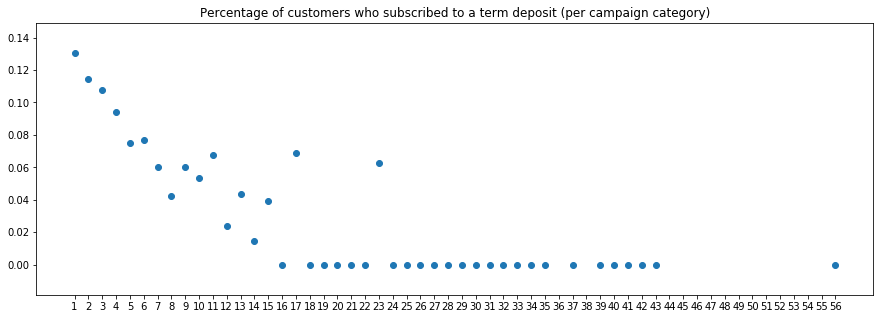

In [64]:
plt.figure(figsize = (15,5))
sns.countplot(x='campaign',data=data)
plt.show()

unique_campaign = np.unique(data.campaign)

campaign_yes = []
campaign_no = []

for campaign in unique_campaign:
    campaign_yes.append(data[(data.campaign == campaign) & (data.y == 'yes')].count()[0])
    campaign_no.append(data[(data.campaign == campaign) & (data.y == 'no')].count()[0])
campaign_totals = [a + b for a,b in zip(campaign_yes,campaign_no)]
campaign_ratio_yes = [a/b for a,b in zip(campaign_yes,campaign_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_campaign,campaign_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per campaign category)')
plt.xticks(list(range(1,57)))
plt.show()

<a id='Campaign.i'></a>
#### 2.12.1
#### Insights:
- Any customers contacted more than 6 times are outliers in the data
- The absolute difference of likelihood between customers contacted less than 6 times is < 6%
- We will drop this column

In [65]:
data = data.drop(labels = 'campaign', axis = 1)

In [66]:
data

,age,job,marital,education,default,contact,month,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Pdays'></a>
### 2.13
### Pdays
Variable information:
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

#### To get a readable scale for doing our analysis, we will change where pdays == 999 to pdays == -1

In [67]:
data.pdays.loc[data.pdays == 999] = -1

C:\Users\bindu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


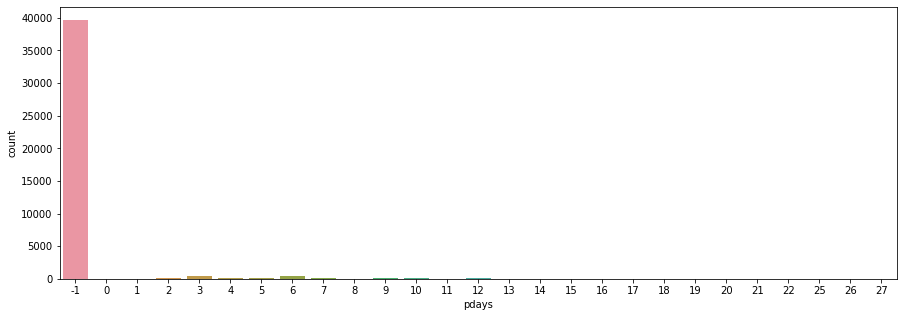

Lets take a look at the same graph but zoomed in to see how many customers there are in the other pdays category


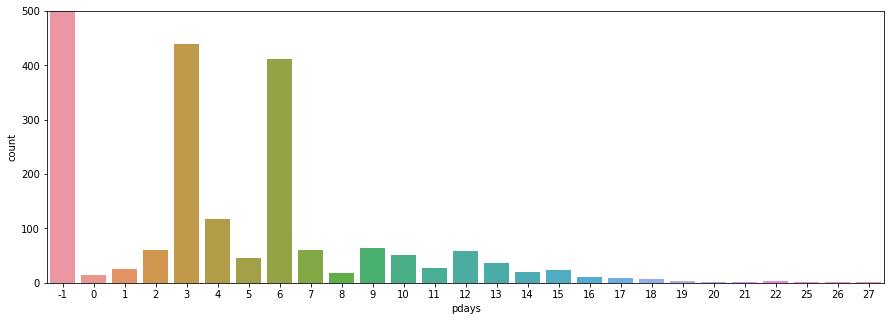

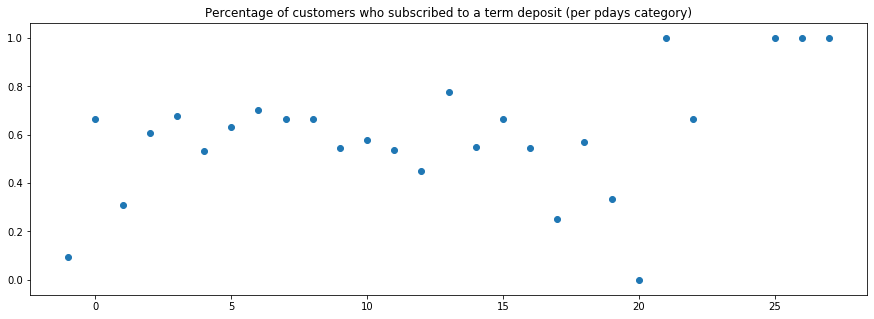

In [68]:
plt.figure(figsize = (15,5))
sns.countplot(x='pdays',data=data)
plt.show()

print('Lets take a look at the same graph but zoomed in to see how many customers there are in the other pdays category')

plt.figure(figsize = (15,5))
sns.countplot(x='pdays',data=data)
plt.ylim(0,500)
plt.show()

unique_pdays = np.unique(data.pdays)

pdays_yes = []
pdays_no = []

for pdays in unique_pdays:
    pdays_yes.append(data[(data.pdays == pdays) & (data.y == 'yes')].count()[0])
    pdays_no.append(data[(data.pdays == pdays) & (data.y == 'no')].count()[0])
pdays_totals = [a + b for a,b in zip(pdays_yes,pdays_no)]
pdays_ratio_yes = [a/b for a,b in zip(pdays_yes,pdays_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_pdays,pdays_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per pdays category)')
plt.show()

<a id='Pdays.i'></a>
#### 2.13.1
#### Insights: 
- Lets take note that the large majority (over 85%) of customers have not been contacted during a previous campaign
- We should take a closer look at only the data for customers that were contacted during the last campaign
- By looking at the previous campaign data, we might draw more insights that we can leverage in our model

#### Using only the points corresponding to customers who were contacted during the last campaign and fitting a line, we see there is a weak positive correlation between the pdays and likelihood of subscription

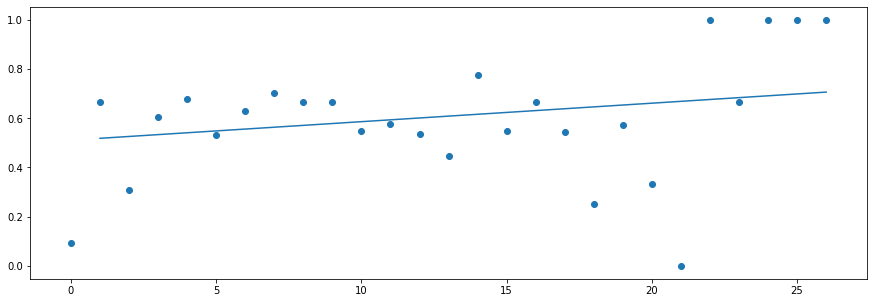

In [69]:
x = list(range(1,27))
z = np.polyfit(x,pdays_ratio_yes[1:],1)
y = z[1] + np.multiply(x,z[0])
plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.scatter(list(range(0,27)),pdays_ratio_yes)

We will drop this column from the dataset

In [70]:
data = data.drop(labels = 'pdays',axis = 1)

In [71]:
data

,age,job,marital,education,default,contact,month,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0,1,0,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0,0,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0,1,1,0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,0,1,1,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<a id='Previous'></a>
### 2.14 
### Previous
Variable information:
- previous: number of contacts performed before this campaign and for this client (numeric)

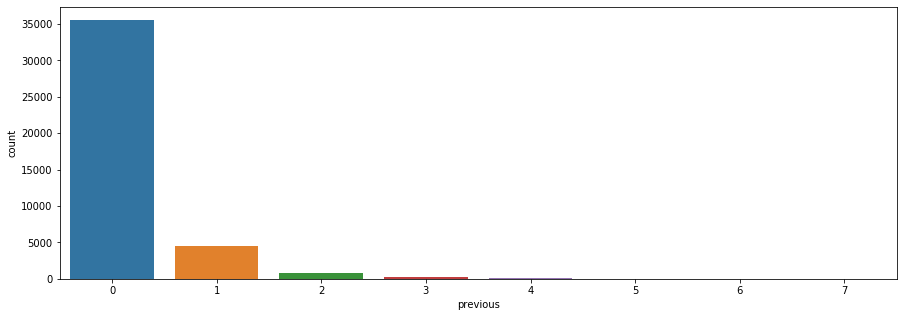

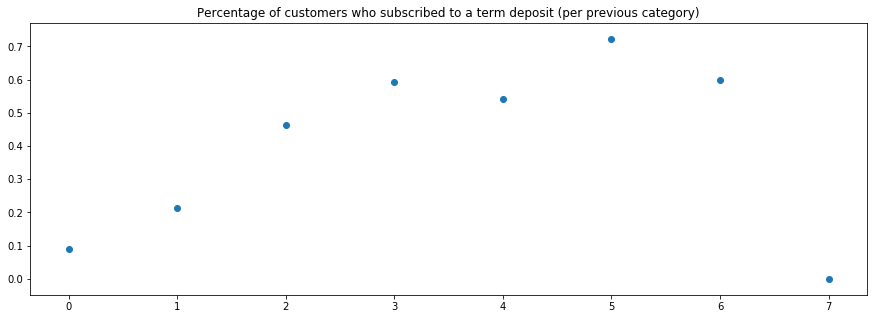

In [72]:
plt.figure(figsize = (15,5))
sns.countplot(x='previous',data=data)
plt.show()

unique_previous = np.unique(data.previous)

previous_yes = []
previous_no = []

for previous in unique_previous:
    previous_yes.append(data[(data.previous == previous) & (data.y == 'yes')].count()[0])
    previous_no.append(data[(data.previous == previous) & (data.y == 'no')].count()[0])
previous_totals = [a + b for a,b in zip(previous_yes,previous_no)]
previous_ratio_yes = [a/b for a,b in zip(previous_yes,previous_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_previous,previous_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per previous category)')
plt.show()

<a id='Previous.i'></a>
#### 2.14.1
#### Insights:
- We see the likelihood of subscription increase with number of previous contacts

<a id='Previous.f'></a>
#### 2.14.2
#### Feature transformation of the previous variable
We will use the percentages above to transform the data in the following groups:
- Percentage > 0.4 will be category 1
- Percentage < 0.4 will be category 0

In [73]:
data.previous.loc[data.previous.isin([0,1,7])] = 0
data.previous.loc[data.previous.isin([2,3,4,5,6])] = 1

#### Let's take a look at the variable after transformation

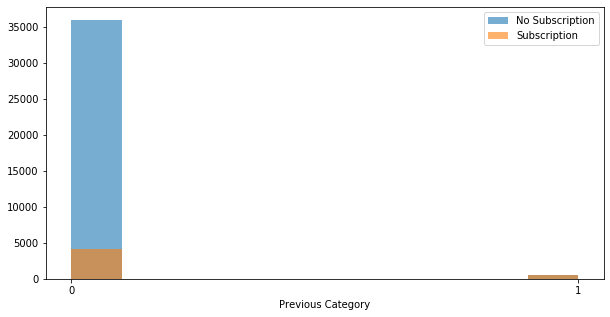

In [74]:
plt.figure(figsize = (10,5))
data.groupby('y').previous.hist(grid = False, alpha = 0.6)
plt.xlabel('Previous Category')
plt.legend(['No Subscription','Subscription'])
plt.xticks([0,1])
plt.show()

#### Let's take a look at the same variable using the results of the previous campaign.

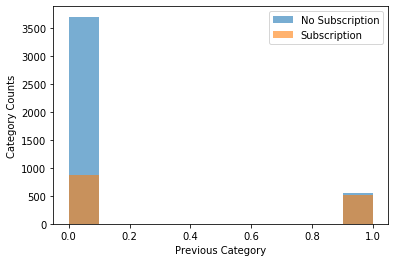

In [75]:
pCampaign = data[data.poutcome.isin(['failure','success'])]
pCampaign.groupby('poutcome').previous.hist(grid = False, alpha = 0.6)
plt.legend(['No Subscription', 'Subscription'])
plt.ylabel('Category Counts')
plt.xlabel('Previous Category')
plt.show()

#### Insights:
- As we can see, the same holds true for the results of the previos campaign

<a id='POutcome'></a>
### 2.15 
### POutcome
Variable information:
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

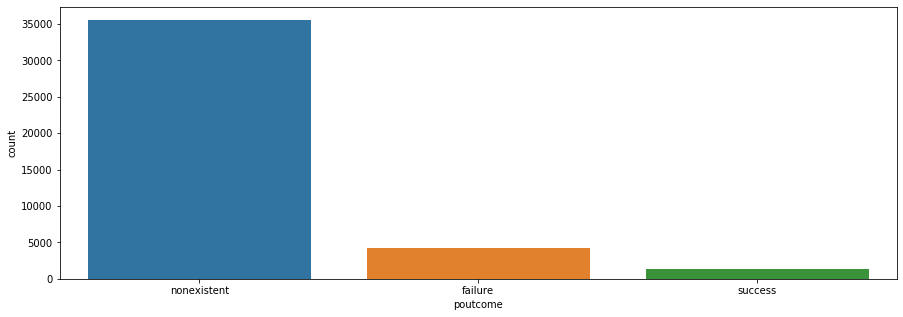

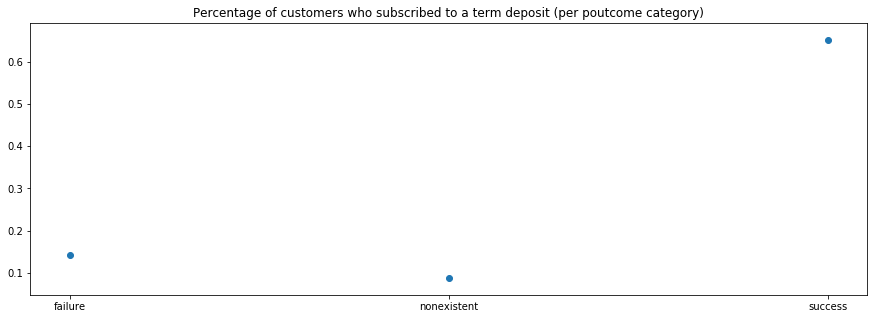

In [76]:
plt.figure(figsize = (15,5))
sns.countplot(x='poutcome',data=data)
plt.show()

unique_poutcome = np.unique(data.poutcome)

poutcome_yes = []
poutcome_no = []

for poutcome in unique_poutcome:
    poutcome_yes.append(data[(data.poutcome == poutcome) & (data.y == 'yes')].count()[0])
    poutcome_no.append(data[(data.poutcome == poutcome) & (data.y == 'no')].count()[0])
poutcome_totals = [a + b for a,b in zip(poutcome_yes,poutcome_no)]
poutcome_ratio_yes = [a/b for a,b in zip(poutcome_yes,poutcome_totals)]

plt.figure(figsize = (15,5))
plt.scatter(unique_poutcome,poutcome_ratio_yes)
plt.title('Percentage of customers who subscribed to a term deposit (per poutcome category)')
plt.show()

<a id='POutcome.i'></a>


#### 2.15.1
#### Insights:
- Customers who were previously sold a bank term deposit are 50% more likely to subscribe to another term deposit.
- Marketing campaigns can be focused on these customers with extra time appointed to other subsets of individuals.

<a id='POutcome.i'></a>


#### 2.15.2
#### Feature transformation of the Poutcome variable into numerical variable

Using the percentage of individuals (in a given poutcome category) that subscribed to a bank term deposit, we will transform the variable into one of two categories:
- Success will be category 1
- Failure/NonExistent will be category 0

In [84]:
mask1 = data.poutcome == 'success'
mask0 = data.poutcome.isin(['failure','nonexistent'])

data.poutcome.loc[mask1] =1 
data.poutcome.loc[mask0] =0 
data

C:\Users\bindu\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,job,marital,education,default,contact,month,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,0,1,0,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,0,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,0,1,1,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


#### The remaining columns:
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Are related to economic attributes, they will be left as is.

#### Now all of our data is transformed and we have learned some insights from our exploratory data analysis.

<a id='Data_scaling'></a>
## 3. 
## Data Scaling

#### Some of the models we will be using perform better when data is normalized so lets do that now

In [78]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#### Convert the label for y from string to int

In [85]:
mask0 = data.y == 'no'
mask1 = data.y == 'yes'

# convert the label for y from string to int
data.y.loc[mask0] = 0
data.y.loc[mask1] = 1

#### Split the data into train and test 

In [86]:
Y = data.y
X = data.drop(labels = 'y',axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

#### Rescale the data

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='Data_balancing'></a>
## 4. 
## Data Balancing

Because our original dataset is very imbalanced:
- Class 0: 89%
- Class 1: 11%

We will try a resampling method to balance out the classes. We will essentialy be undersampling the majority class and over sampling the minority class. Additionally, points will be removed as needed if they are Tomek links.

In [89]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [91]:
from imblearn.combine import SMOTETomek
from collections import Counter

Using TensorFlow backend.


In [92]:
sm = SMOTETomek(random_state = 1)
X_res, Y_res = sm.fit_resample(X_train_scaled, Y_train)

#### Note:  
- The resampled data corresponds to the scaled data.
- When we train on X_res, we need to test on X_test_scaled


#### Lets see how many data points we have in each class

In [93]:
print('Class 0: ', Counter(Y_res)[0])
print('Class 1: ', Counter(Y_res)[1])

Class 0:  26849
Class 1:  26849


#### Now that we have transformed all the data, lets start building models and evaluating their performance

<a id='ML'></a>
## 5.
## Machine Learning Models

In [94]:
from sklearn.metrics import plot_roc_curve
import pickle
from sklearn.model_selection import cross_val_score

<a id='ML.rf'></a>
### 5.1
### Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#### Set up the parameters for the Random Grid Search with Cross Validation

In [96]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [97]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'recall',cv = 5, verbose=2, random_state=1, n_jobs = -1)

#### Lets try using the original (Not the resampled) data

In [98]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 207.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 237.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Save the random forest model

In [99]:
filename = 'rf_random_model.sav'
pickle.dump(rf_random,open(filename,'wb'))

#### Load the random forest model

In [73]:
filename = 'rf_random_model.sav'
rf_random = pickle.load(open(filename,'rb'))

In [74]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [75]:
best_rf = rf_random.best_estimator_
predictions_rf = best_rf.predict(X_test)
print(classification_report(Y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.94      0.43      0.59      9132
           1       0.15      0.79      0.25      1165

    accuracy                           0.47     10297
   macro avg       0.55      0.61      0.42     10297
weighted avg       0.85      0.47      0.55     10297



#### Now lets try using the resampled data

In [139]:
rf = RandomForestClassifier()
rf_res_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'recall',cv = 5, verbose=2, random_state=1, n_jobs = -1)

In [140]:
rf_res_random.fit(X_res,Y_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 44.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Save the model

In [141]:
filename = 'rf_res_random.sav'
pickle.dump(rf_res_random,open(filename,'wb'))

#### Load the model

In [142]:
filename = 'rf_res_random.sav'
rf_res_random = pickle.load(open(filename,'rb'))

In [143]:
rf_res_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [144]:
best_res_rf = rf_res_random.best_estimator_
predictions_res_rf = best_res_rf.predict(X_test_scaled)
print(classification_report(Y_test,predictions_res_rf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9132
           1       0.38      0.53      0.44      1165

    accuracy                           0.85     10297
   macro avg       0.66      0.71      0.68     10297
weighted avg       0.87      0.85      0.86     10297



#### Notes on Random Forest Models:
- Random Forest (original data):  
    - asd
- Random Forest (resampled data):  
    - asdf

<a id='ML.lr'></a>
### 5.2
### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegressionCV

#### Let's use the StandardScaler to scale the data before we fit the Logistic Regression Model

#### Original Data - No Resampling

In [78]:
lr_clf = LogisticRegressionCV(max_iter = 3000,random_state = 1)

lr_clf.fit(X_train_scaled,Y_train)

print(classification_report(Y_test, lr_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9132
           1       0.66      0.20      0.30      1165

    accuracy                           0.90     10297
   macro avg       0.78      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



#### Resampled Data

In [79]:
lr_res_clf = LogisticRegressionCV(max_iter = 3000, random_state = 1)

lr_res_clf.fit(X_res,Y_res)

print(classification_report(Y_test, lr_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      9132
           1       0.31      0.69      0.43      1165

    accuracy                           0.79     10297
   macro avg       0.63      0.75      0.65     10297
weighted avg       0.88      0.79      0.82     10297



#### Notes on Logistic Regression Models:  
- Logistic Regression (original data):
    - Accuracy 90%
    - Recall (True Positive Rate) 20%  
    - Precision (Positive Predictive Value) 64%
- Logisitc Regression (resampled data):
    - Accuracy 79%
    - Recall (True Positive Rate) 69%
    - Precision (Positive Predictive Value) 31%

<a id='ML.knn'></a>
### 5.3
### K-Nearest Neighbors

In [80]:
from sklearn import neighbors

#### Original Data ( Not Resampled)

#### Lets search through a range of K values and choose the optimal K

In [ ]:
score_= []
n_neighbors_ = list(range(2,100))
for n_neighbors in n_neighbors_:
    nbrs_clf = neighbors.KNeighborsClassifier(n_neighbors)
    nbrs_clf.fit(X_train,Y_train)
    mean_CV_score = np.mean(cross_val_score(nbrs_clf,X_train,Y_train)) 
    score_.append(mean_CV_score)

In [ ]:
max_score = max(score_)
k_index = score_.index(max_score)
best_k = n_neighbors_[k_index]

In [ ]:
nbrs_clf = neighbors.KNeighborsClassifier(best_k)
nbrs_clf.fit(X_train,Y_train)

#### Save the model

In [ ]:
filename = 'knn_clf.sav'
pickle.dump(nbrs_clf,open(filename,'wb'))

#### Load the model

In [81]:
filename = 'knn_clf.sav'
nbrs_clf = pickle.load(open(filename,'rb'))

In [82]:
print(classification_report(Y_test,nbrs_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9132
           1       0.64      0.20      0.31      1165

    accuracy                           0.90     10297
   macro avg       0.77      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



#### Resampled Data

In [86]:
score_res = []
n_neighbors_ = list(range(2,100))

for n_neighbors in n_neighbors_:
    nbrs_res_clf = neighbors.KNeighborsClassifier(n_neighbors)
    nbrs_res_clf.fit(X_res,Y_res)
    mean_CV_score = np.mean(cross_val_score(nbrs_res_clf,X_res,Y_res)) 
    score_res.append(mean_CV_score)

In [87]:
max_score = max(score_res)
k_index = score_res.index(max_score)
best_res_k = n_neighbors_[k_index]

In [88]:
nbrs_res_clf = neighbors.KNeighborsClassifier(best_res_k)
nbrs_res_clf.fit(X_res,Y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Save the model

In [89]:
filename = 'knn_res_clf.sav'
pickle.dump(nbrs_res_clf,open(filename,'wb'))

#### Load the model

In [83]:
filename = 'knn_res_clf.sav'
nbrs_res_clf = pickle.load(open(filename,'rb'))

In [90]:
print(classification_report(Y_test,nbrs_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9132
           1       0.47      0.40      0.43      1165

    accuracy                           0.88     10297
   macro avg       0.70      0.67      0.68     10297
weighted avg       0.87      0.88      0.88     10297



#### Results for KNN:
Both the scaled and unscaled data were classified equally.

<a id='ML.gb'></a>
### 5.4
### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)
print(classification_report(Y_test,gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9132
           1       0.65      0.23      0.34      1165

    accuracy                           0.90     10297
   macro avg       0.78      0.61      0.64     10297
weighted avg       0.88      0.90      0.88     10297



In [93]:
gb_res_clf = GradientBoostingClassifier()
gb_res_clf.fit(X_res,Y_res)
print(classification_report(Y_test,gb_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.63      0.75      9132
           1       0.20      0.75      0.32      1165

    accuracy                           0.64     10297
   macro avg       0.58      0.69      0.54     10297
weighted avg       0.87      0.64      0.70     10297



<a id='ML.nn'></a>
### 5.5
### Neural Network

In [94]:
from sklearn.neural_network import MLPClassifier

#### Original Data (not resampled)

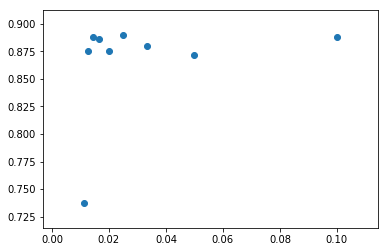

In [154]:
alpha_ = [1/x for x in range(10,100,10)]
score_ = []
for alpha in alpha_:
    nn_clf = MLPClassifier(hidden_layer_sizes = [100,100],alpha =alpha ,random_state=1)
    nn_clf.fit(X_train,Y_train)
    #score_.append(nn_clf.score(X_test,Y_test))
    score_.append(np.mean(cross_val_score(nn_clf,X_train,Y_train)))
plt.figure()
plt.scatter(alpha_,score_)
plt.show()

In [155]:
max_score = max(score_)
max_index = score_.index(max_score)
best_alpha = alpha_[max_index]

In [156]:
best_alpha

0.025

In [157]:
nn_clf = MLPClassifier(hidden_layer_sizes = [100,100],alpha =alpha ,random_state=1)
nn_clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.011111111111111112, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Save the model

In [158]:
filename = 'nn_clf.sav'
pickle.dump(nn_clf,open(filename,'wb'))

#### Load the model

In [159]:
filename = 'nn_clf.sav'
nn_clf = pickle.load(open(filename,'rb'))

In [160]:
print(classification_report(Y_test,nn_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9132
           1       0.00      0.00      0.00      1165

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297



#### Resampled Data

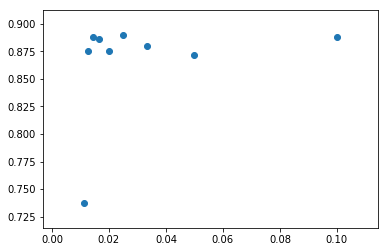

In [161]:
alpha_ = [1/x for x in range(10,100,10)]
score_res = []
for alpha in alpha_:
    nn_res_clf = MLPClassifier(hidden_layer_sizes = [100,100],alpha =alpha ,random_state=1)
    nn_res_clf.fit(X_res,Y_res)
    #score_res.append(nn_res_clf.score(X_test_scaled,Y_test))
    score_res.append(np.mean(cross_val_score(nn_res_clf,X_train,Y_train)))
plt.figure()
plt.scatter(alpha_,score_res)
plt.show()

In [162]:
max_res_score = max(score_res)
max_res_index = score_res.index(max_res_score)
best_res_alpha = alpha_[max_res_index]

In [163]:
nn_res_clf = MLPClassifier(hidden_layer_sizes = [100,100],alpha =alpha ,random_state=1)
nn_res_clf.fit(X_train_scaled,Y_train)

MLPClassifier(activation='relu', alpha=0.011111111111111112, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Save the model

In [166]:
filename = 'nn_res_clf.sav'
pickle.dump(nn_res_clf,open(filename,'wb'))

#### Load the model

In [167]:
filename = 'nn_res_clf.sav'
nn_res_clf = pickle.load(open(filename,'rb'))

In [168]:
print(classification_report(Y_test,nn_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9132
           1       0.00      0.00      0.00      1165

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297



<a id='ML.xgb'></a>
### 5.6
### XGBoost

In [98]:
from xgboost import XGBClassifier

Original Data - No res

In [99]:
xgb_clf = XGBClassifier(seed = 1)
xgb_clf.fit(X_train,Y_train)
print(classification_report(Y_test,xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9132
           1       0.68      0.23      0.34      1165

    accuracy                           0.90     10297
   macro avg       0.79      0.61      0.64     10297
weighted avg       0.88      0.90      0.88     10297



In [100]:
xgb_res_clf = XGBClassifier(seed = 1)
xgb_res_clf.fit(X_res,Y_res)
print(classification_report(Y_test,xgb_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9132
           1       0.39      0.62      0.48      1165

    accuracy                           0.85     10297
   macro avg       0.67      0.75      0.70     10297
weighted avg       0.89      0.85      0.86     10297



<a id='ME'></a>
### 6.

### Model Evaluation (Reciever Operator Characteristic Curve & Area Under Curve)

NameError: name 'nn_res_clf' is not defined

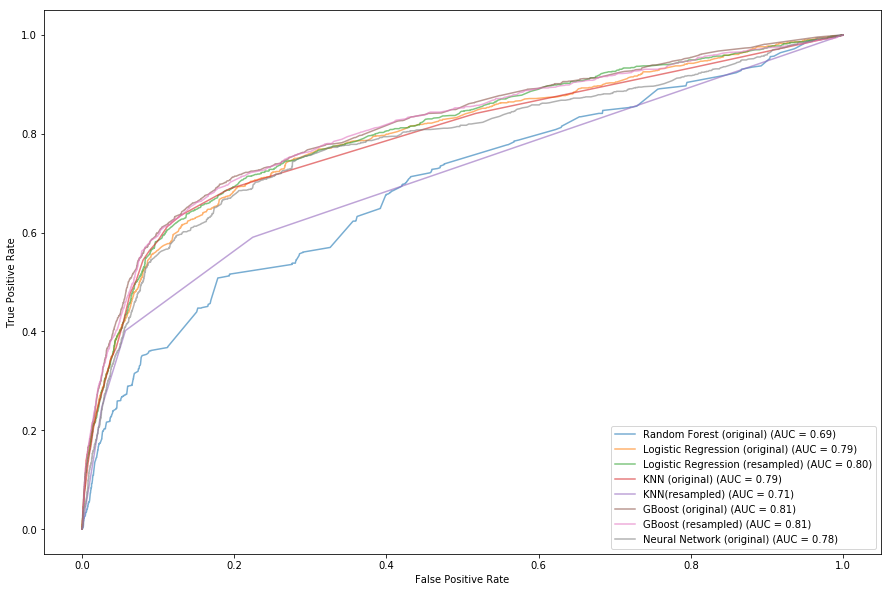

In [108]:
fig = plt.figure(figsize =(15,10))
ax = fig.gca()
plot_roc_curve(rf_random,X_test, Y_test,ax = ax, name = 'Random Forest (original)', alpha = 0.6)
#plot_roc_curve(rf_random_res,X_test_scaled, Y_test,ax = ax, name = 'Random Forest (resampled)', alpha = 0.6)

plot_roc_curve(lr_clf,X_test_scaled, Y_test,ax = ax, name = 'Logistic Regression (original)', alpha = 0.6)
plot_roc_curve(lr_res_clf,X_test_scaled, Y_test,ax = ax, name = 'Logistic Regression (resampled)', alpha = 0.6)

plot_roc_curve(nbrs_clf,X_test, Y_test,ax = ax, name = 'KNN (original)', alpha = 0.6)
plot_roc_curve(nbrs_res_clf,X_test_scaled, Y_test,ax = ax, name = 'KNN(resampled)', alpha = 0.6)

plot_roc_curve(gb_clf,X_test, Y_test,ax = ax, name = 'GBoost (original)', alpha = 0.6)
plot_roc_curve(gb_res_clf,X_test_scaled, Y_test,ax = ax, name = 'GBoost (resampled)', alpha = 0.6)

plot_roc_curve(nn_clf,X_test, Y_test,ax = ax, name = 'Neural Network (original)', alpha = 0.6)
plot_roc_curve(nn_res_clf,X_test_scaled, Y_test,ax = ax, name = 'Neural Network (resampled)', alpha = 0.6)

plot_roc_curve(xgb_clf,X_test, Y_test,ax = ax, name = 'XGBoost (original)', alpha = 0.6)
plot_roc_curve(xgb_res_clf,X_test_scaled, Y_test,ax = ax, name = 'XGBoost (resampled)', alpha = 0.6)


<a id='Voting'></a>
#### 6.1
#### Voting Classifier

By aggregating the results from different classifiers above, we can construct a new classifier which uses a voting scheme.

In [109]:
from sklearn.ensemble import VotingClassifier

#### Original Data

In [135]:
v_clf = VotingClassifier(estimators = [('lr',lr_clf),('knn',nbrs_clf),('xgb',xgb_clf)])
v_clf.fit(X_train,Y_train)
print(classification_report(Y_test,v_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9132
           1       0.70      0.20      0.31      1165

    accuracy                           0.90     10297
   macro avg       0.80      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



#### Resampled Data

In [136]:
v_res_clf = VotingClassifier(estimators = [('lr_res',lr_res_clf),('knn_res',nbrs_res_clf),('xgb_res',xgb_res_clf)])
v_res_clf.fit(X_res,Y_res)
print(classification_report(Y_test,v_res_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9132
           1       0.39      0.63      0.48      1165

    accuracy                           0.85     10297
   macro avg       0.67      0.75      0.70     10297
weighted avg       0.89      0.85      0.86     10297



<a id='FE'></a>
#### 6.2
#### Final Evaluation

- By using the voting classifier we can get a better performance
- We retain a high f1-score, 85%, which is a good measure of overall performance
- Recall is 63% (class 1), which means we capture a majority of the customers willing to make a term subscription
- Precision is 39% (class 1), which means about half the customers contacted through this prediction scheme will subscribe to a term deposit

<a id='R&I'></a>
#### 6.3
#### Reccomnedations & Insights

- The bank could benefit from increased marketing towards individuals of ages 17-21 & greater than 60
- Students are ~30% likely to subscribe to a term deposit
- Retirees are ~25% likely to subscribe to a term deposit
- Customers whose marital status is unknown or single are more likely to subscribe to a term deposit
- Customers with no loans in default are more likely to subscribe to a term deposit
- When contacting customers, cellular communication works best
- Marketing campaigns should be concentrated in the months of Mar, Sep, Oct, Dec

Using targeted marketing, this bank should work to reach new customers using the insights from above. This list of customers can then be filtered using the classifier we have built in this notebook to yield maximum results and increase revenues through term deposits with minimal overhead and increased efficiency.